In [2]:
# importa as bibliotecas utilizadas na análise dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
low_memory=False

In [3]:
# declaraçãos das variáveis
anos = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
inscritos = []
presentes = []

In [4]:
# Leitura dos arquivos e criação do Data Frame
for ano in anos:
    # Algumas colunas do arquivo de 2014 possuem nomes diferentes dos demais arquivos
    if str(ano) == '2012' or str(ano) == '2014':
        df = pd.read_csv('MICRODADOS_ENEM_'+str(ano)+'.csv', delimiter=',', encoding='iso-8859-1', usecols=['NU_ANO', 'IN_PRESENCA_CN', 'IN_PRESENCA_CH', 'IN_PRESENCA_LC', 'IN_PRESENCA_MT', 'NU_INSCRICAO'])    
        df.columns = ['NU_INSCRICAO', 'NU_ANO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
    # os arquivos de 2014 e de 2015 possuem a ',' como separadores, enquanto os demais possuem ';'
    elif str(ano) == '2015':
        df = pd.read_csv('MICRODADOS_ENEM_'+str(ano)+'.csv', delimiter=',', encoding='iso-8859-1', usecols=['NU_ANO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_INSCRICAO'])
    elif str(ano) == '2013':
        df = pd.read_csv('MICRODADOS_ENEM_'+str(ano)+'.csv', delimiter=';', encoding='iso-8859-1', usecols=['NU_ANO', 'IN_PRESENCA_CN', 'IN_PRESENCA_CH', 'IN_PRESENCA_LC', 'IN_PRESENCA_MT', 'NU_INSCRICAO'])
        df.columns = ['NU_INSCRICAO', 'NU_ANO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
    else:
        df = pd.read_csv('MICRODADOS_ENEM_'+str(ano)+'.csv', delimiter=';', encoding='iso-8859-1', usecols=['NU_ANO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_INSCRICAO'])
    # adiciona os valores às listas
    inscritos.append(len(df['NU_INSCRICAO']))
    presentes.append(df.query('(TP_PRESENCA_CN == 2 or TP_PRESENCA_CN == 1) and (TP_PRESENCA_CH == 2 or TP_PRESENCA_CH == 1) and (TP_PRESENCA_LC == 2 or TP_PRESENCA_LC == 1) and (TP_PRESENCA_MT == 2 or TP_PRESENCA_MT == 1)')['NU_INSCRICAO'].count())

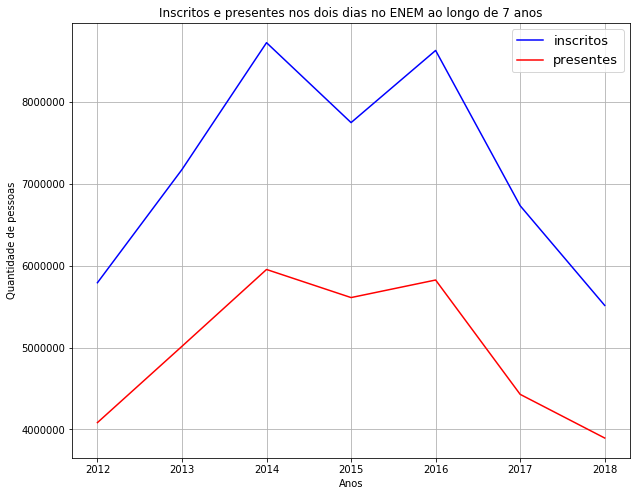

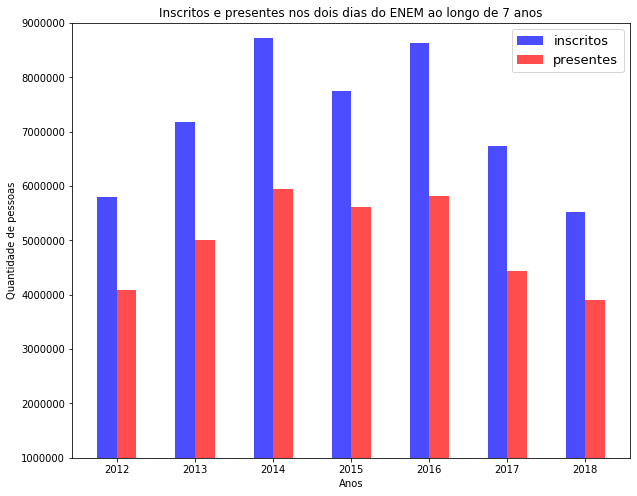

In [5]:
# Definindo o tamanho das figuras
plt.rcParams['figure.figsize'] = (10,8)
# Plotando os gráficos
plt.figure(1)
plt.plot(anos, inscritos, color='blue', label='inscritos')
plt.plot(anos, presentes, color='red', label='presentes')
#plt.ylim(1000000, 9500000)
#plt.axis([2012, 2018, 1000000, 9500000])
plt.title('Inscritos e presentes nos dois dias no ENEM ao longo de 7 anos')
plt.xlabel('Anos')
plt.ylabel('Quantidade de pessoas')
plt.legend(prop={'size':13})
plt.grid(True)
plt.show()

plt.figure(2)
barWidth = 0.25
r1 = np.arange(len(anos))
plt.bar(r1, inscritos, barWidth, alpha=0.7, color='blue', label='inscritos')
plt.bar(r1 + barWidth, presentes, barWidth, alpha=0.7, color='red', label='presentes')
plt.ylim(1000000, 9000000)
plt.xlabel('Anos')
plt.xticks([r + 0.125 for r in range(len(inscritos))], ['2012', '2013', '2014', '2015', '2016', '2017', '2018'])
plt.ylabel('Quantidade de pessoas')
plt.title('Inscritos e presentes nos dois dias do ENEM ao longo de 7 anos')
plt.legend(prop={'size':13})
plt.show()

In [6]:
# Tabela para visualização dos dados
porcent_ausentes = []
porcent_presentes = []
for i in range(len(anos)):
    porcent_ausentes.append(round((1-(presentes[i]/inscritos[i]))*100, 2))
    porcent_presentes.append(round((presentes[i]/inscritos[i])*100, 2))

tabela = {}
for i in range(len(anos)):    
    tabela.update({anos[i]: [inscritos[i], presentes[i], porcent_presentes[i], porcent_ausentes[i]]})
df_tabela = pd.DataFrame(tabela, columns=anos, index=['Inscritos','Presentes', 'Presentes (%)', 'Ausentes (%)'])
df_tabela

,2012,2013,2014,2015,2016,2017,2018
Inscritos,5791065.00,7173563.00,8722248.00,7746427.00,8627367.00,6731341.00,5513747.00
Presentes,4083143.00,5014864.00,5952812.00,5609795.00,5824191.00,4428022.00,3894587.00
Presentes (%),70.51,69.91,68.25,72.42,67.51,65.78,70.63
Ausentes (%),29.49,30.09,31.75,27.58,32.49,34.22,29.37
